In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dat = pd.read_csv('./healthcare-dataset-stroke-data.csv', index_col=0)

In [7]:
dat

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


### 1. 전처리

In [8]:
df = dat.dropna()

In [9]:
df.shape

(4909, 11)

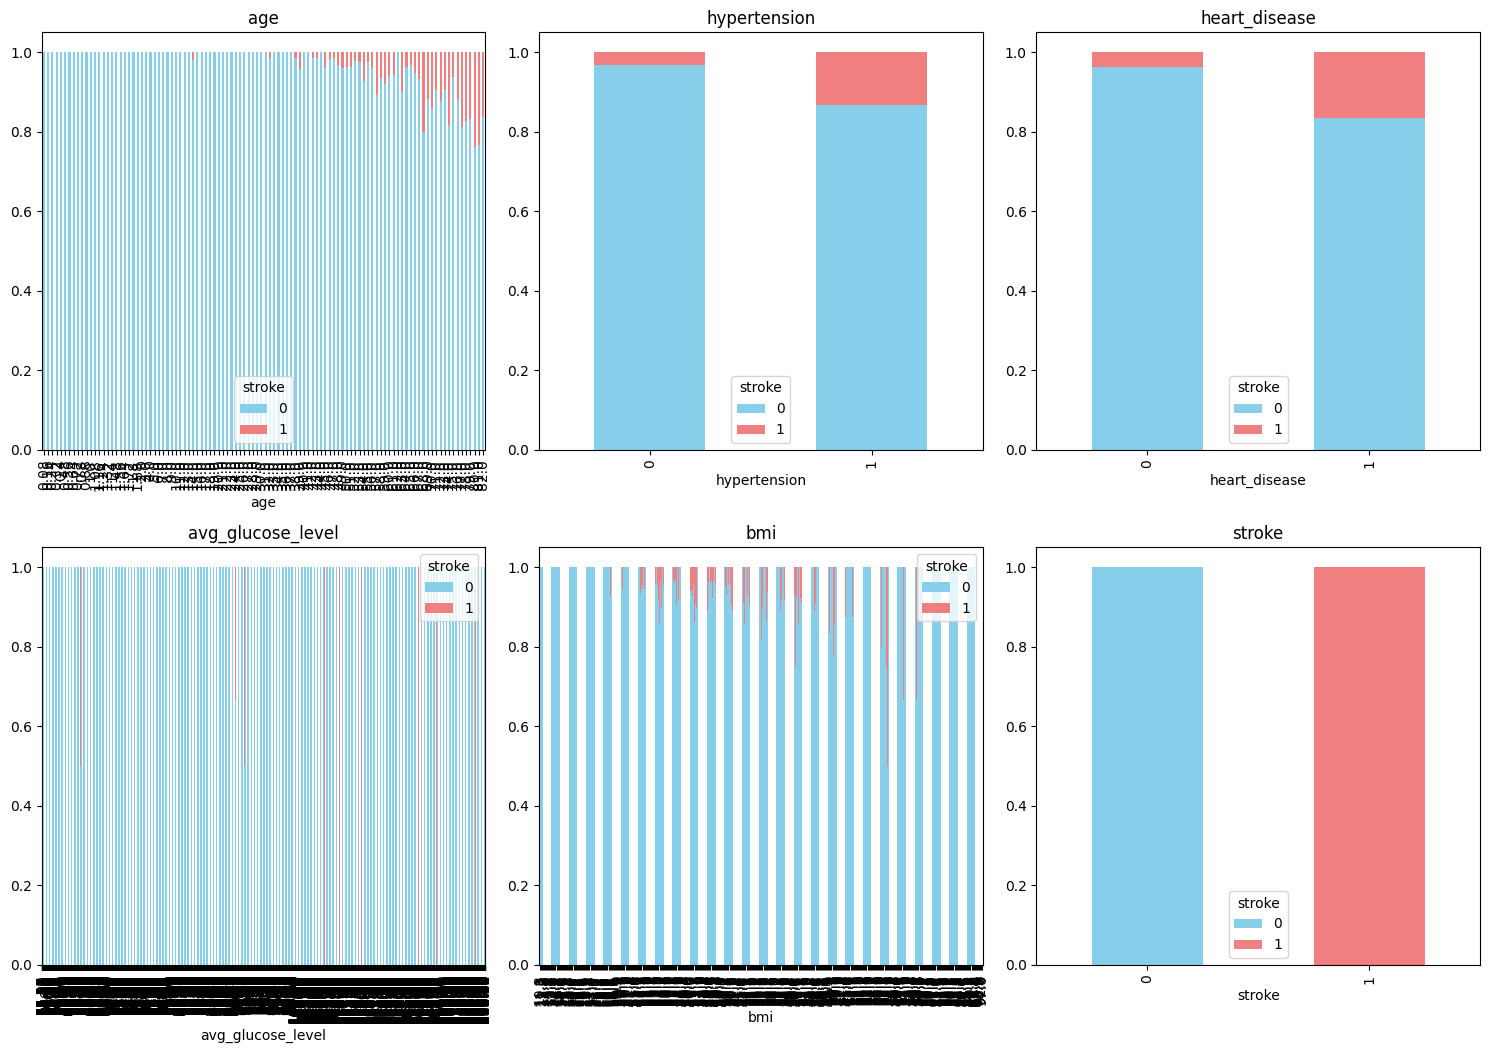

In [10]:
# 숫자형 데이터 열 추출
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# subplot 설정
n_cols = 3
n_rows = len(numerical_columns) // n_cols + 1

plt.figure(figsize=(15, 5 * n_rows))

# Plot each numerical column as a stacked barplot using pd.crosstab
for i, col_name in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # subplot을 설정합니다.
    
    # 교차 테이블로 stroke 여부에 따른 값을 계산
    corr = pd.crosstab(df[col_name], df['stroke'], normalize='index')
    
    # 현재 subplot에 barplot을 그립니다.
    corr.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], ax=plt.gca())
    
    plt.title(col_name)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [11]:
### cate 데이터
from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder()

for col in df.select_dtypes(include=['object']):
  df[col]=OH.fit_transform(df[[col]]).toarray()
df.head()

/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_69234/3554651292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=OH.fit_transform(df[[col]]).toarray()
/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_69234/3554651292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=OH.fit_transform(df[[col]]).toarray()
/var/folders/68/bfrdrq513456x7ygy_s1ggc00000gn/T/ipykernel_69234/3554651292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0.0,67.0,0,1,0.0,0.0,0.0,228.69,36.6,0.0,1
31112,0.0,80.0,0,1,0.0,0.0,1.0,105.92,32.5,0.0,1
60182,1.0,49.0,0,0,0.0,0.0,0.0,171.23,34.4,0.0,1
1665,1.0,79.0,1,0,0.0,0.0,1.0,174.12,24.0,0.0,1
56669,0.0,81.0,0,0,0.0,0.0,0.0,186.21,29.0,0.0,1


In [12]:
df.shape

(4909, 11)

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns.shape

(11,)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

# SMOTE 적용
smote = SMOTE(random_state=2024)
X = df.drop(columns='stroke')
y = df['stroke']

X_smote, y_smote = smote.fit_resample(X, y)

# RobustScaler 적용
scaler = RobustScaler()
X_smote = scaler.fit_transform(X_smote)

# 데이터 분할 (stratify=y_smote로 변경)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, train_size=0.8, random_state=2024, shuffle=True, stratify=y_smote)

# 결과 확인
X_train.shape

(7520, 10)

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
res_rf = rf.fit(X_train, y_train)

yhat_train = res_rf.predict(X_train)
ytrue_train = y_train

yhat_test = res_rf.predict(X_test)
ytrue_test = y_test

roc_auc_score(ytrue_train, yhat_train)

1.0

In [19]:
roc_auc_score(ytrue_test, yhat_test)

0.9707446808510639

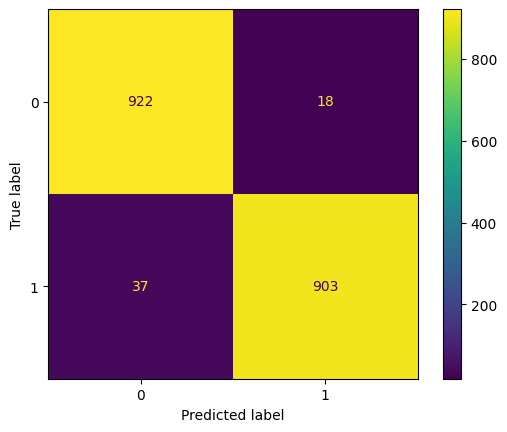

In [20]:
cm = confusion_matrix(ytrue_test, yhat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()